<a href="https://colab.research.google.com/github/DivyaDariniSivabalan/Unified-Mentor/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Sales data (1).csv to Amazon Sales data (1) (2).csv


In [ ]:
df = pd.read_csv("Amazon Sales data (1).csv")

In [ ]:
df.head(5)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.shape

(100, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


**Observation** : There is **no null values** . The data is **cleaned**

<Axes: >

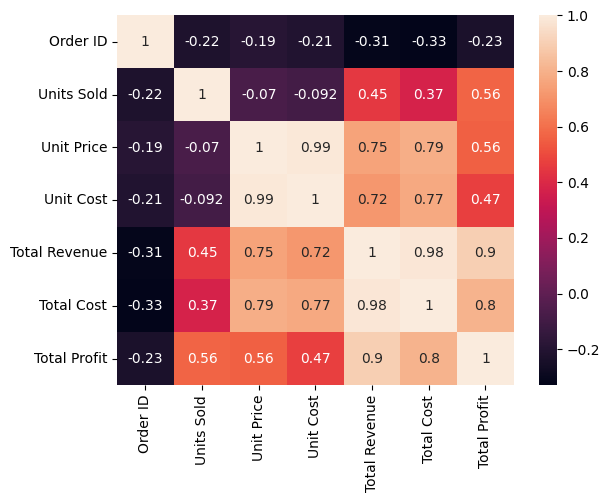

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

**Higher Unit sold and Unit Prices are strongly correlated with increased total profit and revenue**

In [ ]:
df['Item Type'].value_counts()

,count
Item Type,
Clothes,13
Cosmetics,13
Office Supplies,12
Fruits,10
Personal Care,10
Household,9
Beverages,8
Baby Food,7
Cereal,7


**Clothes** are the **best** selled products

In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [ ]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [ ]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5


In [ ]:
r = df['Region'].nunique()
r

7

**7** different **Region**

In [ ]:
c = df['Country'].nunique()
c

76

**76** different **Country**

In [ ]:
u = df['Unit Cost'].sum()
u

19104.8

In [ ]:
v = df['Units Sold'].sum()
v

512871

In [ ]:
 q = df['Units Sold'].sum()
 q

512871

In [ ]:
t = df['Total Revenue'].sum()
t

137348768.31

In [ ]:
o = df['Total Profit'].sum()
o

44168198.39999999

In [ ]:
df.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

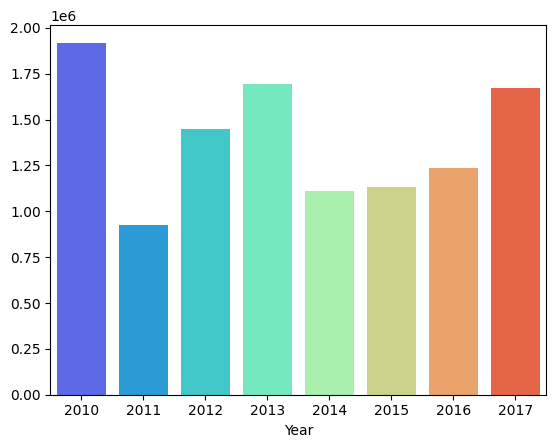

In [ ]:
a = df.groupby('Year')['Total Revenue'].mean()
sns.barplot(x=a.index,y=a.values,palette='rainbow')
plt.show()

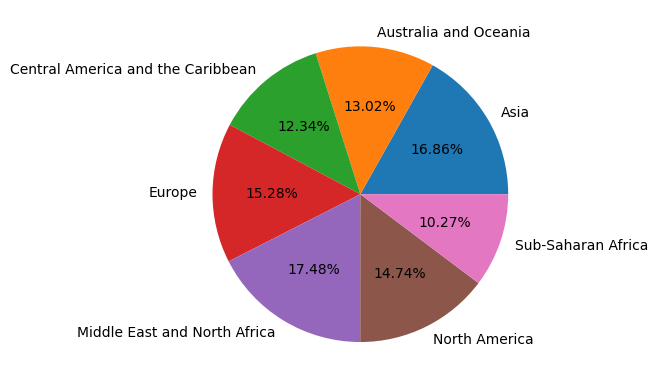

In [ ]:
i = df.groupby('Region')['Total Profit'].mean()
plt.pie(i,labels = i.index,autopct = '%1.2f%%')
plt.show()

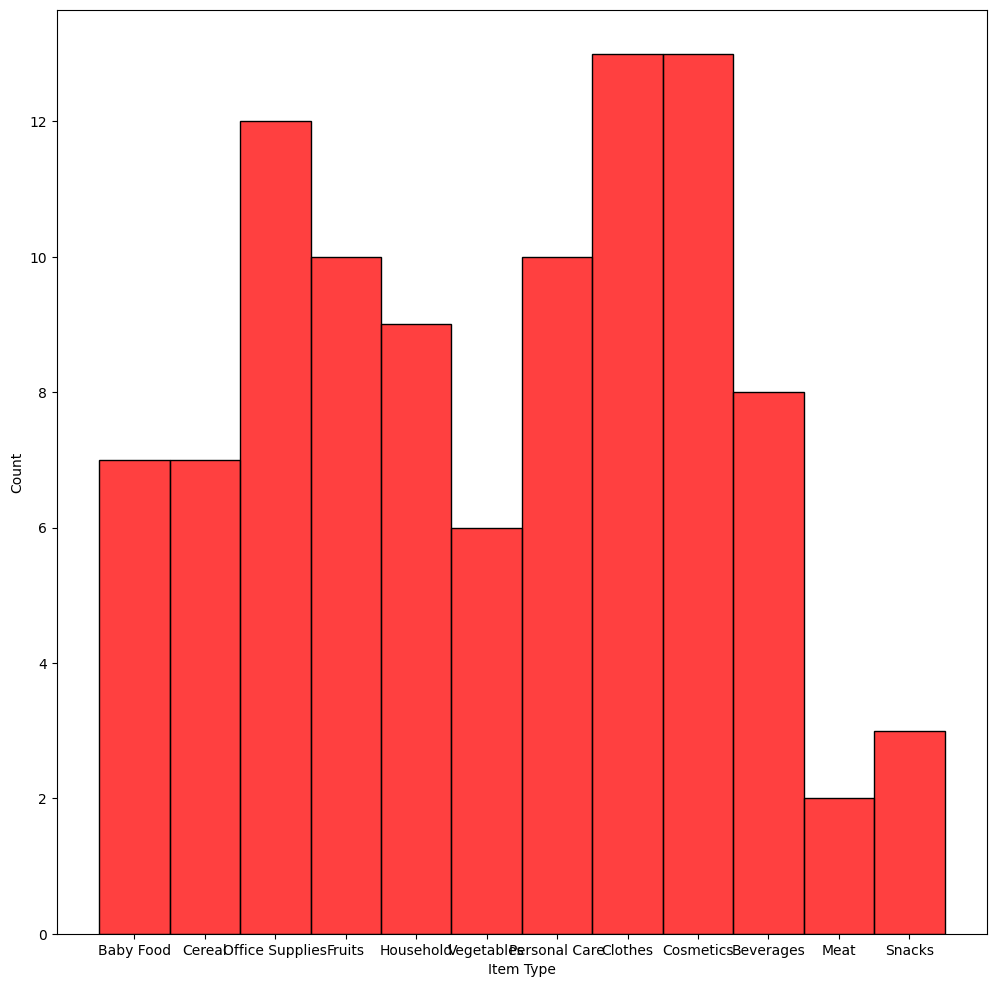

In [ ]:
p = df.groupby('Item Type')['Total Revenue'].sum()
fig, ax = plt.subplots(figsize=(12, 12))
sns.histplot(x='Item Type',data=df,bins = 10,color = 'red',ax=ax)
plt.show()

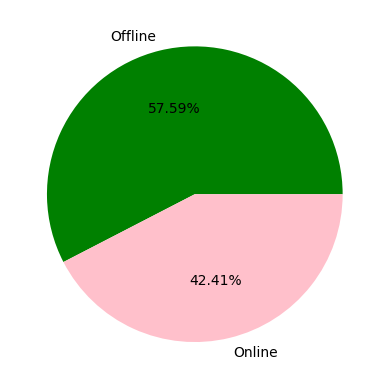

In [ ]:
b = df.groupby('Sales Channel')['Total Revenue'].sum()
plt.pie(b,labels = b.index,autopct ='%1.2f%%',colors = ['green','pink'])
plt.show()

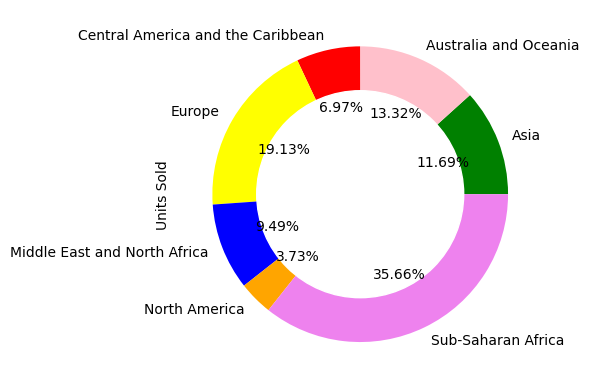

In [ ]:
c = df.groupby('Region')['Units Sold'].sum()
c.plot(kind = 'pie',labels = c.index,autopct = '%1.2f%%',colors = ['green','pink','red','yellow','blue','orange','violet'])
l = plt.Circle((0,0),0.7,color = 'white')
plt.gcf().gca().add_artist(l)
plt.show()

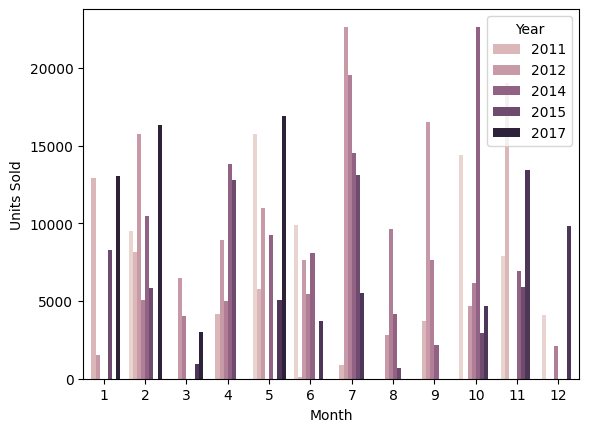

In [ ]:
h = df.groupby(['Year','Month'])['Units Sold'].sum().reset_index()
sns.barplot(x = 'Month',y = 'Units Sold',hue = 'Year',data = h)
plt.show()

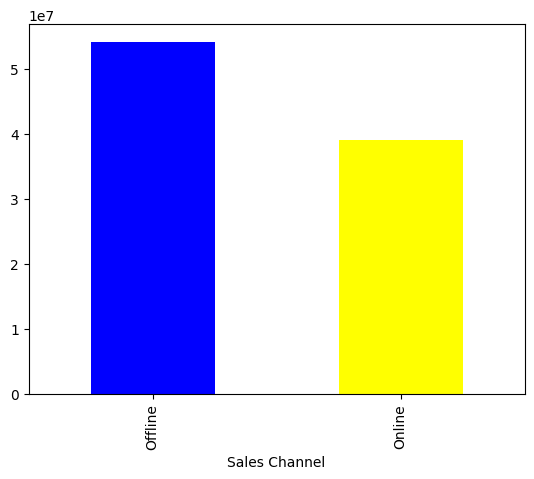

In [ ]:
j = df.groupby('Sales Channel')['Total Cost'].sum()
j.plot(kind = 'bar',color = ['blue','yellow','pink'])
plt.show()

In [ ]:
 fd = df.to_csv('amazon.csv',index = False)
 fd